In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
total_num_cpus = 10000

max_cpus = 5000
max_time = 1000
maxjob = max_cpus * max_time

def get_random_jobs(num):
    jobs = np.random.randint(low=(1,1), high=(max_time, max_cpus), size=(num, 2))
    return jobs

num = 10000
jobs = get_random_jobs(num)
print(jobs)

[[  64 4850]
 [ 248 3423]
 [ 340 4820]
 ...
 [ 632 3818]
 [ 947  836]
 [ 950 4001]]


Text(0, 0.5, 'Count')

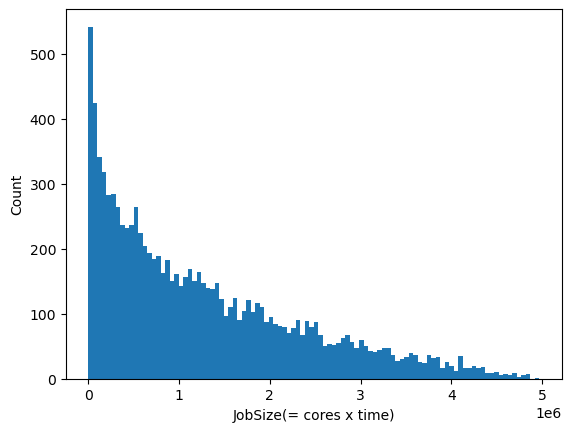

In [4]:
d, x, ax = plt.hist(jobs.prod(axis=1), bins=100)
plt.xlabel("JobSize(= cores x time)")
plt.ylabel("Count")

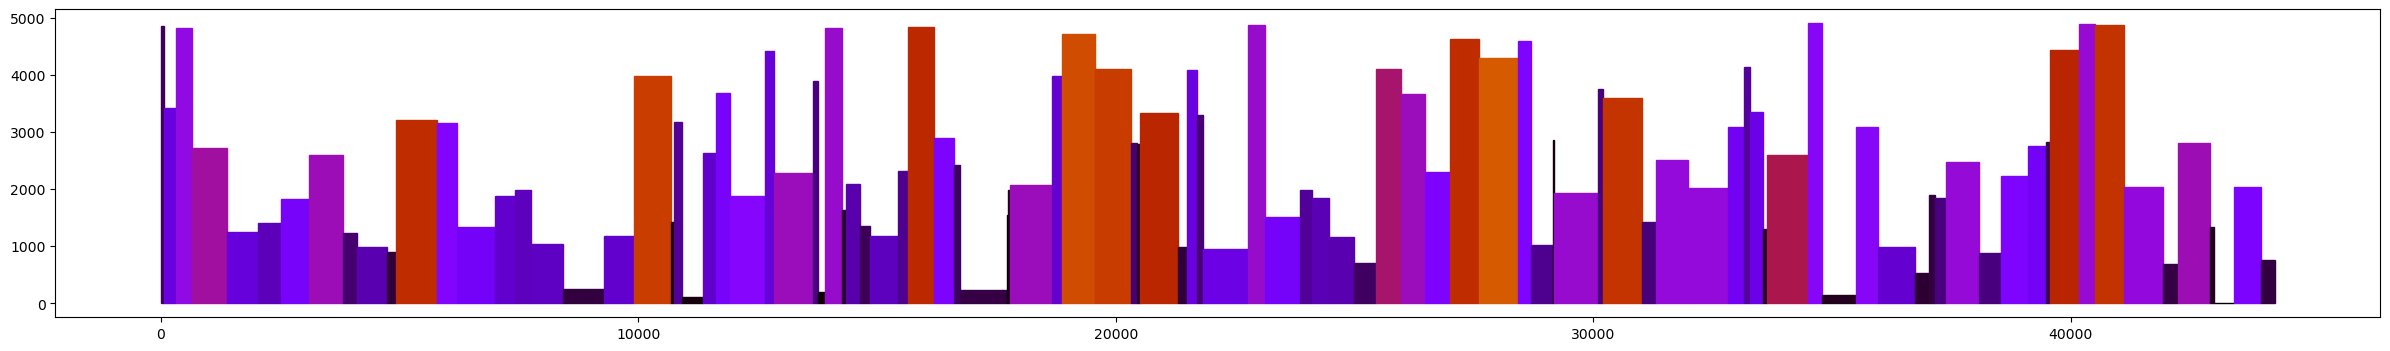

In [5]:
start, end = 0, 100
shift = 0
mcm = plt.cm.gnuplot

plt.figure(figsize=(30,4))
for job in jobs[start:end]:
    x, y = job
    sq = np.array([(shift, 0), (shift + x, 0), (shift + x, y), (shift, y)]).T
    plt.fill(sq[0], sq[1], c=mcm(x*y/maxjob))
    shift += x
plt.show()

In [6]:
from manim import *
config.media_width = "100%"
config.verbosity = "WARNING"

Manim Community v0.18.0.post0

In [7]:
class DifferentRotations(Scene):
    def construct(self):
        left_square = Square(color=BLUE, fill_opacity=0.7).shift(2 * LEFT)
        right_square = Square(color=GREEN, fill_opacity=0.7).shift(2 * RIGHT)
        self.play(
            left_square.animate.rotate(PI/2), Rotate(right_square, angle=PI), run_time=2
        )
        self.play(
            left_square.animate.rotate(PI/2), Rotate(right_square, angle=PI), run_time=2
        )
        self.wait()
%manim -qm DifferentRotations

In [8]:
import heapq

def backfilling_est(N, jobs):
    # Sort jobs by their start times
    jobs.sort(key=lambda x: x[1])
    
    # Priority queue to store jobs that can be backfilled
    backfill_queue = []
    
    # Current time
    current_time = 0
    
    # Loop through each job
    for job in jobs:
        cores_required, start_time = job
        
        # Check if the job can start immediately or needs to wait
        if start_time <= current_time:
            # Job can start immediately
            print(f"Job with {cores_required} cores started at time {current_time}")
            current_time += 1
        else:
            # Job needs to wait, check if backfilling is possible
            while backfill_queue and current_time < start_time:
                backfill_job = heapq.heappop(backfill_queue)
                backfill_cores, _ = backfill_job
                print(f"Backfilling job with {backfill_cores} cores started at time {current_time}")
                current_time += 1
                
            if current_time < start_time:
                # No suitable job for backfilling, wait until the current job can start
                current_time = start_time
                print(f"Waiting until time {current_time} for job with {cores_required} cores to start")
                
        # Add the current job to the backfill queue if it's not using all available cores
        if cores_required < N:
            heapq.heappush(backfill_queue, (cores_required, current_time + 1))
            
        # Update current time
        current_time += 1

# Example usage
N = 8  # Total number of cores available
jobs = [(2, 0), (3, 2), (4, 4), (2, 5), (3, 6)]  # Jobs: (cores_required, start_time)

backfilling_est(N, jobs)


Job with 2 cores started at time 0
Job with 3 cores started at time 2
Job with 4 cores started at time 4
Job with 2 cores started at time 6
Job with 3 cores started at time 8


In [11]:
import heapq
import random

def backfilling_est(N, jobs):
    # Generate random start times for each job
    jobs_with_start_times = [(cores_required, time_requested, random.randint(0, 10)) for cores_required, time_requested in jobs]
    
    # Sort jobs by their start times
    jobs_with_start_times.sort(key=lambda x: x[2])
    
    # Priority queue to store jobs that can be backfilled
    backfill_queue = []
    
    # Current time
    current_time = 0
    
    # Loop through each job
    for job in jobs_with_start_times:
        cores_required, time_requested, start_time = job
        
        # Check if the job can start immediately or needs to wait
        if start_time <= current_time:
            # Job can start immediately
            print(f"Job with {cores_required} cores started at time {current_time}")
            current_time += 1
        else:
            # Job needs to wait, check if backfilling is possible
            while backfill_queue and current_time < start_time:
                backfill_job = heapq.heappop(backfill_queue)
                backfill_cores, _, _ = backfill_job
                print(f"Backfilling job with {backfill_cores} cores started at time {current_time}")
                current_time += 1
                
            if current_time < start_time:
                # No suitable job for backfilling, wait until the current job can start
                current_time = start_time
                print(f"Waiting until time {current_time} for job with {cores_required} cores to start")
                
        # Add the current job to the backfill queue if it's not using all available cores
        if cores_required < N:
            heapq.heappush(backfill_queue, (cores_required, time_requested, current_time + 1))
            
        # Update current time
        current_time += 1

# Example usage
N = 8  # Total number of cores available
jobs = [(2, 4), (3, 6), (4, 8), (2, 5), (3, 7)]  # Jobs: (cores_required, time_requested)

backfilling_est(N=1000, jobs=get_random_jobs(1000))


Job with 906 cores started at time 0
Job with 689 cores started at time 2
Job with 593 cores started at time 4
Job with 96 cores started at time 6
Job with 993 cores started at time 8
Job with 999 cores started at time 10
Job with 127 cores started at time 12
Job with 986 cores started at time 14
Job with 313 cores started at time 16
Job with 581 cores started at time 18
Job with 738 cores started at time 20
Job with 606 cores started at time 22
Job with 454 cores started at time 24
Job with 843 cores started at time 26
Job with 927 cores started at time 28
Job with 967 cores started at time 30
Job with 657 cores started at time 32
Job with 19 cores started at time 34
Job with 954 cores started at time 36
Job with 590 cores started at time 38
Job with 798 cores started at time 40
Job with 243 cores started at time 42
Job with 110 cores started at time 44
Job with 724 cores started at time 46
Job with 838 cores started at time 48
Job with 427 cores started at time 50
Job with 764 cores 

In [13]:
import heapq
import random

def backfilling_est(N, jobs):
    # Sort jobs by their start times
    jobs.sort(key=lambda x: x[3])
    
    # Priority queue to store jobs that can be backfilled
    backfill_queue = []
    
    # Current time
    current_time = 0
    
    # Sequence of jobs submitted
    sequence = []
    
    # Loop through each job
    for job in jobs:
        job_id, cores_required, time_requested, start_time = job
        
        # Check if the job can start immediately or needs to wait
        if start_time <= current_time:
            # Job can start immediately
            sequence.append(job_id)
            current_time += 1
        else:
            # Job needs to wait, check if backfilling is possible
            while backfill_queue and current_time < start_time:
                backfill_job = heapq.heappop(backfill_queue)
                backfill_job_id, _, _, _ = backfill_job
                sequence.append(backfill_job_id)
                current_time += 1
                
            if current_time < start_time:
                # No suitable job for backfilling, wait until the current job can start
                current_time = start_time
                sequence.append(job_id)
                
        # Add the current job to the backfill queue if it's not using all available cores
        if cores_required < N:
            heapq.heappush(backfill_queue, (job_id, cores_required, time_requested, current_time + 1))
            
        # Update current time
        current_time += 1
    
    # Handle remaining jobs in the backfill queue
    while backfill_queue:
        backfill_job = heapq.heappop(backfill_queue)
        backfill_job_id, _, _, _ = backfill_job
        sequence.append(backfill_job_id)
        current_time += 1
    
    return sequence

# Example usage
N = 8  # Total number of cores available
jobs = [(1, 2, 4, 0), (2, 3, 6, 1), (3, 4, 8, 2), (4, 2, 5, 3), (5, 3, 7, 4)]  # Jobs: (job_id, cores_required, time_requested, start_time)

sequence = backfilling_est(N, jobs)
print("Sequence of jobs submitted:", sequence)


Sequence of jobs submitted: [1, 2, 3, 4, 5, 1, 2, 3, 4, 5]


In [14]:
sequence

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [15]:
import heapq
import random

def backfilling_est(N, jobs):
    # Sort jobs by their start times
    jobs.sort(key=lambda x: x[3])
    
    # Priority queue to store jobs that can be backfilled
    backfill_queue = []
    
    # Current time
    current_time = 0
    
    # Sequence of jobs submitted
    sequence = []
    
    # Loop through each job
    for job in jobs:
        job_id, cores_required, time_requested, start_time = job
        
        # Check if the job can start immediately or needs to wait
        if start_time <= current_time:
            # Job can start immediately
            sequence.append((job_id, start_time))
            current_time += 1
        else:
            # Job needs to wait, check if backfilling is possible
            while backfill_queue and current_time < start_time:
                backfill_job = heapq.heappop(backfill_queue)
                backfill_job_id, _, _, backfill_start_time = backfill_job
                sequence.append((backfill_job_id, backfill_start_time))
                current_time += 1
                
            if current_time < start_time:
                # No suitable job for backfilling, wait until the current job can start
                current_time = start_time
                sequence.append((job_id, start_time))
                
        # Add the current job to the backfill queue if it's not using all available cores
        if cores_required < N:
            heapq.heappush(backfill_queue, (job_id, cores_required, time_requested, current_time + 1))
            
        # Update current time
        current_time += 1
    
    # Handle remaining jobs in the backfill queue
    while backfill_queue:
        backfill_job = heapq.heappop(backfill_queue)
        backfill_job_id, _, _, backfill_start_time = backfill_job
        sequence.append((backfill_job_id, backfill_start_time))
        current_time += 1
    
    return sequence

# Generate 10 random jobs
random_jobs = [(i, random.randint(1, 5), random.randint(1, 10), random.randint(0, 10)) for i in range(1, 11)]

# Run backfilling scheduling algorithm
sequence = backfilling_est(8, random_jobs)

# Print intended and actual start times for each job
print("Job ID\tIntended Start Time\tActual Start Time")
for job_id, intended_start_time in random_jobs:
    actual_start_time = next(start_time for j_id, start_time in sequence if j_id == job_id)
    print(f"{job_id}\t{intended_start_time}\t\t\t{actual_start_time}")


Job ID	Intended Start Time	Actual Start Time


ValueError: too many values to unpack (expected 2)

In [16]:
import heapq
import random

def backfilling_est(N, jobs):
    # Sort jobs by their start times
    jobs.sort(key=lambda x: x[3])
    
    # Priority queue to store jobs that can be backfilled
    backfill_queue = []
    
    # Current time
    current_time = 0
    
    # Sequence of jobs submitted
    sequence = []
    
    # Loop through each job
    for job in jobs:
        job_id, cores_required, time_requested, start_time = job
        
        # Check if the job can start immediately or needs to wait
        if start_time <= current_time:
            # Job can start immediately
            sequence.append((job_id, current_time))
            current_time += 1
        else:
            # Job needs to wait, check if backfilling is possible
            while backfill_queue and current_time < start_time:
                backfill_job = heapq.heappop(backfill_queue)
                backfill_job_id, _, _, backfill_start_time = backfill_job
                sequence.append((backfill_job_id, current_time))
                current_time += 1
                
            if current_time < start_time:
                # No suitable job for backfilling, wait until the current job can start
                current_time = start_time
                sequence.append((job_id, current_time))
                
        # Add the current job to the backfill queue if it's not using all available cores
        if cores_required < N:
            heapq.heappush(backfill_queue, (job_id, cores_required, time_requested, current_time + 1))
            
        # Update current time
        current_time += 1
    
    # Handle remaining jobs in the backfill queue
    while backfill_queue:
        backfill_job = heapq.heappop(backfill_queue)
        backfill_job_id, _, _, backfill_start_time = backfill_job
        sequence.append((backfill_job_id, current_time))
        current_time += 1
    
    return sequence

# Generate 10 random jobs
random_jobs = [(i, random.randint(1, 5), random.randint(1, 10), random.randint(0, 10)) for i in range(1, 11)]

# Run backfilling scheduling algorithm
sequence = backfilling_est(8, random_jobs)

# Print intended and actual start times for each job
print("Job ID\tIntended Start Time\tActual Start Time")
for job_id, intended_start_time, _, _ in random_jobs:
    actual_start_time = next(start_time for j_id, start_time in sequence if j_id == job_id)
    print(f"{job_id}\t{intended_start_time}\t\t\t{actual_start_time}")


Job ID	Intended Start Time	Actual Start Time
4	3			0
3	4			2
2	5			4
10	3			6
8	3			8
9	4			10
5	3			12
7	2			14
6	2			16
1	5			18


In [22]:
from manim import *

class DrawRectangles(Scene):
    def construct(self):
        rectangles = []

        for i in range(5):
            # Create a rectangle with width 1 and height 2
            rectangle = Rectangle(width=1, height=2)

            # Position the rectangle to the right of the previous one
            if i == 0:
                rectangle.move_to(3 * LEFT)
            else:
                rectangle.next_to(rectangles[i - 1], LEFT)

            rectangles.append(rectangle)

        # Animate the drawing of rectangles
        self.play(*[Create(rectangle) for rectangle in rectangles])

        # Animate the movement of rectangles from right to left
        self.play(*[ApplyMethod(rectangle.shift, 3 * LEFT) for rectangle in rectangles])


# To render the animation, use the following command:
# manim -pql DrawRectangles.py DrawRectangles
%manim -qm DrawRectangles

In [23]:
import random
from manim import *


class DrawAndMoveRectangles(Scene):
    def construct(self):
        rectangles = []

        # Create 20 rectangles with random lengths and widths
        for i in range(20):
            length = random.randint(1, 10)
            width = random.randint(1, 10)
            rectangle = Rectangle(width=length, height=width)
            rectangles.append(rectangle)

        # Position the rectangles initially off-screen to the right
        for i, rectangle in enumerate(rectangles):
            rectangle.shift(10 * RIGHT)

        # Animate the drawing of rectangles one by one
        for i, rectangle in enumerate(rectangles):
            self.play(Create(rectangle))
            if i + 1 == 5:
                # When count reaches 5, start moving rectangles to the left
                self.play(*[ApplyMethod(rect.shift, 10 * LEFT) for rect in rectangles[i:]])
                break

        self.wait(2)  # Wait for the animation to finish


# To render the animation, use the following command:
# manim -pql DrawAndMoveRectangles.py DrawAndMoveRectangles
%manim -qm DrawAndMoveRectangles